# Analisi predizione Azioni Apple 
### Descrizione:
<br> Il proggetto ha come l'obbiettivo di analizzare e prevedere tramite serie storiche e l'utilizzo del  modello ARIMA, andamento del prezzo delle azioni Apple <br>

<br> Come fonte principale per l'analisi ho scelto di utilizzare Yahoo Finance che mi permette di acquisire tutte le informazioni necessarie sugli stocks<br>
<sr>Importo di seguito le varie librerie tra cui yfance:<sr>


In [37]:
import yfinance as yf # Yahoo Finance per otterere dati storici sull'andamento delle azioni apple
# per la manipolazione dei dati
import pandas as pd 
import numpy as np
#preazioni di grafici
import matplotlib as mpl 
import matplotlib.pyplot as plt
#importazione dei modelli
import statsmodels.api as sm 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict 

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 



<br> Come primo passaggio vado a staziare il miodatafrme scaricando tutto il dataset delle azioni Apple da YF con  un arco temporale di 5 anni: <br>




In [38]:
df = yf.download("AAPL", period = "5y", interval= "1d")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-03,50.820000,51.110001,50.672501,51.102501,49.318886,45448000
2019-07-05,50.837502,51.270000,50.724998,51.057499,49.275444,69062000
2019-07-08,50.202499,50.349998,49.602501,50.005001,48.259686,101354400
2019-07-09,49.799999,50.377499,49.702499,50.310001,48.554043,82312000
2019-07-10,50.462502,50.932499,50.389999,50.807499,49.034176,71588400
...,...,...,...,...,...,...
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700


Converto la frequenza del mio df a giornaliero:
La funzione assicura che il  DataFrame abbia un'osservazione per ogni giorno, inclusi i giorni in cui la borsa è chiusa (come weekend e festività).
Riempie i giorni mancanti:
Se ci sono giorni senza dati (come i weekend), questa funzione li aggiunge al DataFrame.
I valori per questi giorni aggiunti saranno inizialmente NaN (Not a Number).

In [8]:
df = df.asfreq("D")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-28,49.669998,49.875000,49.262501,49.480000,47.753006,124442400.0
2019-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,50.792500,51.122501,50.162498,50.387501,48.628841,109012000.0
2019-07-02,50.352501,50.782501,50.340000,50.682499,48.913540,67740800.0
...,...,...,...,...,...,...
2024-06-23,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000.0
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900.0


<br>questo mi permette di riempire i valori NaN presenti con l'ultimo dato disponibile per dare una continuità al dataset<br>


In [9]:
df =df.fillna(method='ffill')
df

C:\Users\nanat\AppData\Local\Temp\ipykernel_7604\3692985835.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method='ffill')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-28,49.669998,49.875000,49.262501,49.480000,47.753006,124442400.0
2019-06-29,49.669998,49.875000,49.262501,49.480000,47.753006,124442400.0
2019-06-30,49.669998,49.875000,49.262501,49.480000,47.753006,124442400.0
2019-07-01,50.792500,51.122501,50.162498,50.387501,48.628841,109012000.0
2019-07-02,50.352501,50.782501,50.340000,50.682499,48.913540,67740800.0
...,...,...,...,...,...,...
2024-06-23,210.389999,211.889999,207.110001,207.490005,207.490005,246421400.0
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000.0
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900.0


<br>La colonna di amggior interesse per quest analisi è quella 'Close' che mi descive i prezzi in chiusura della borsa quindi l avado ad isolare , l'idice è impostato a Data già dal  dowload  <br>

In [10]:
df = df['Close']
df

Date
2019-06-28     49.480000
2019-06-29     49.480000
2019-06-30     49.480000
2019-07-01     50.387501
2019-07-02     50.682499
                 ...    
2024-06-23    207.490005
2024-06-24    208.139999
2024-06-25    209.070007
2024-06-26    213.250000
2024-06-27    214.100006
Freq: D, Name: Close, Length: 1827, dtype: float64

<pr>Andiamo a visualizzare l'andamento con un primo plot <pr>

<br>SI nota a prima vista un Trend rialzista, una certa volatilità del titolo che riflettono vari eventi storici e macroeconomici e il prezzo è Passato da 50$ nel 2020 a 220 nel 2024 quindi quatruplicato<br>

Text(0, 0.5, 'Prezzo Chiusura')

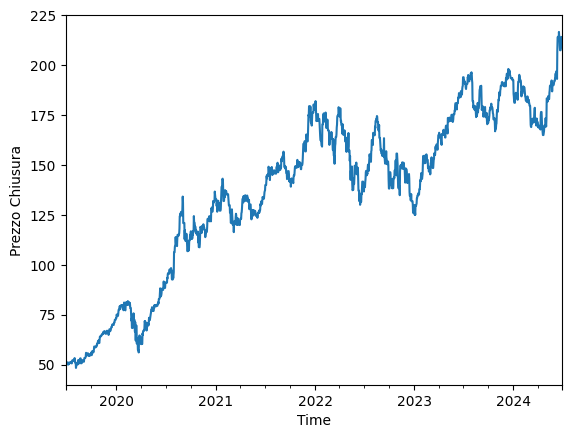

In [11]:
plot = df.plot()
plot.set_xlabel("Time")
plot.set_ylabel("Prezzo Chiusura")

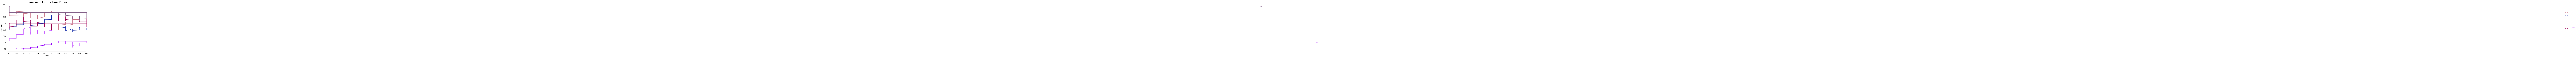

In [36]:
df = df.reset_index()
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.strftime('%b')

# Ordina i mesi per la corretta visualizzazione
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# Ottieni anni unici e assegna colori casuali
years = df['year'].unique()
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Crea la figura
plt.figure(figsize=(10, 6), dpi=100)

# Plot di ciascun anno
for i, y in enumerate(years):
    subset = df[df['year'] == y]
    plt.plot(subset['month'], subset['Close'], color=mycolors[i], label=str(y))
    plt.text(len(subset['month'])-1, subset['Close'].values[-1], y, fontsize=8, color=mycolors[i])

# Configurazione degli assi
plt.gca().set(xlim=(-0.3, 11), ylabel='Close Price', xlabel='Month')
plt.yticks(fontsize=12, alpha=0.7)
plt.xticks(range(len(months)), months)
plt.title("Seasonal Plot of Close Prices", fontsize=20)
plt.show()

<br>Plotto il dataframe per autocorrelazione ACF<br>
<br>Ci permette di indentificicare dipedenze lineari nella ST, determina se la serie è stazionaria , requisito fondamentale per poter procedere con l'attuazione del modello ARIMA, e una volta stazionarizzata ci aiuta a scegliere i parametri del modello in questo caso la (q) ovvero la media mobile<br>
<br>Si nota una forte autocorrelazione,ciò sengna la presenza eventuale di trand e una NON stazionarietà della serie<br>

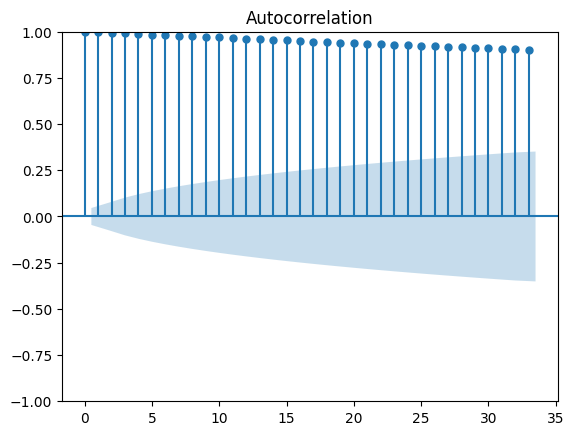

In [13]:
plot_acf(df);

<br>il test Agumented Dickey_fuller è il test che piu ci permette di capire se una serie è stazionaria, testa la presenza di radici unitarie che sono indicative di stazionarietà <br>
<br>Dato i valori alti si conferma la non possibilità di poter rifiutare l'ipotesi nulla<br>

In [14]:
result = adfuller(df)
print('ADF Statistic: {}'.format(result[0]))
print('Level of significance: {}'.format(result[4]))
print('p-value: {}'.format(result[1]))

ADF Statistic: -1.2777811175172717
Level of significance: {'1%': -3.433936263195097, '5%': -2.8631241351249, '10%': -2.5676133397235263}
p-value: 0.6392751926271116


<br>Calcolo la differenza tra ogni osservazione e quella precedente, passaggio fondamentale per la resa stazionaria di una serie: <pr>
<br> e poter dare un valore al campo (d) della serie ARIMA che sta a significare quante volte ho differenziato una serie<br>
<br>plotto per individuare la prensenza di alcuni pattern ciclici per presenze stagionali<br>

<Axes: xlabel='Date'>

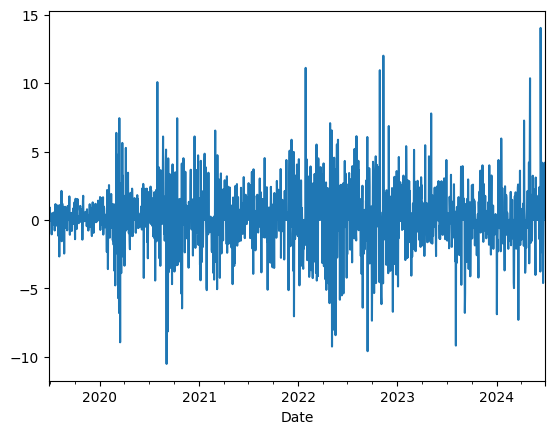

In [16]:
df_diff = df.diff()
df_diff
df_diff.plot()

<br>Rieseguiamo il test di Dickey Fuller sulla serie storica differenziata:<br>
<br> Ci conferma che possiamo rifiutate l'ipotesi di non stazionarietà, quindi la serie è stazionaria <br>


In [19]:

result = adfuller(df_diff)
print('ADF Statistic: {}'.format(result[0]))
print('Level of significance: {}'.format(result[4]))
print('p-value: {}'.format(result[1]))

ADF Statistic: -16.00278766714592
Level of significance: {'1%': -3.4339921916016345, '5%': -2.8631488249300574, '10%': -2.5676264862577503}
p-value: 6.483407034959949e-29


<br>Riprovo a plottre ACF per accettarmi della sua stazionarietà e mancanza di trend:<br>

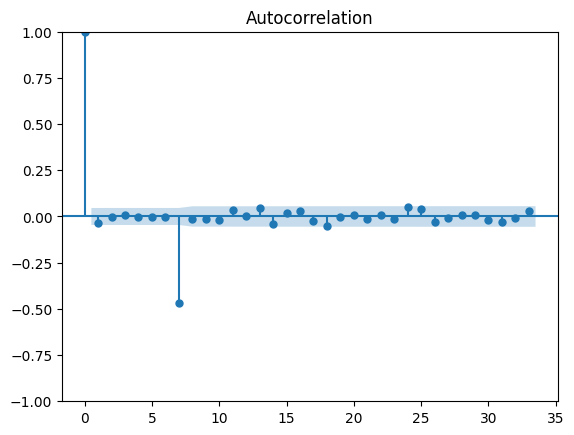

In [20]:
plot_acf(df_diff);

<br>Plotto il PACF, per determinare l'ordine (p) del  termine autoregressimo del modello ARIMA<br>

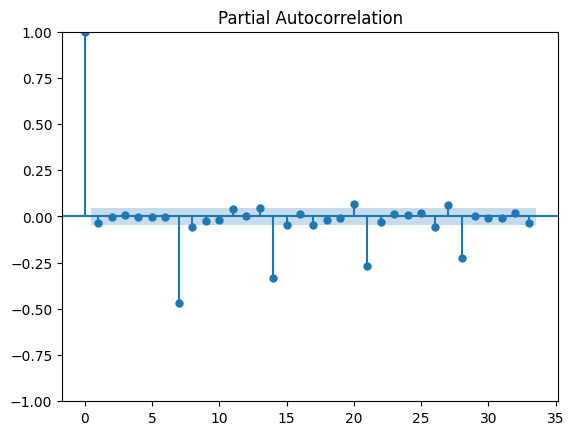

In [21]:
plot_pacf(df_diff, method='ywm');

<pr> Plotto i residui per capire se il modello si adatta bene ai mei dati:<pr>

<Axes: title={'center': 'Residuals'}, xlabel='Date'>

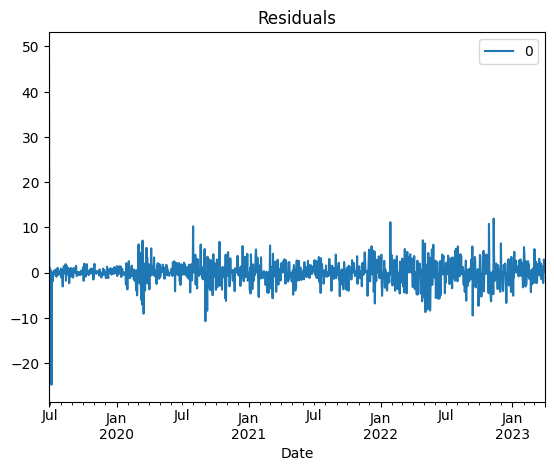

In [30]:
residuals = pd.DataFrame(result.resid)
residuals.plot(title="Residuals")

<Axes: title={'center': 'Density'}, ylabel='Density'>

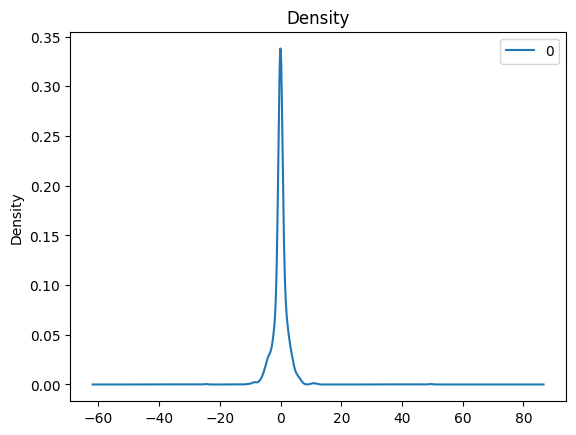

In [31]:
residuals.plot(kind='density', title='Density')

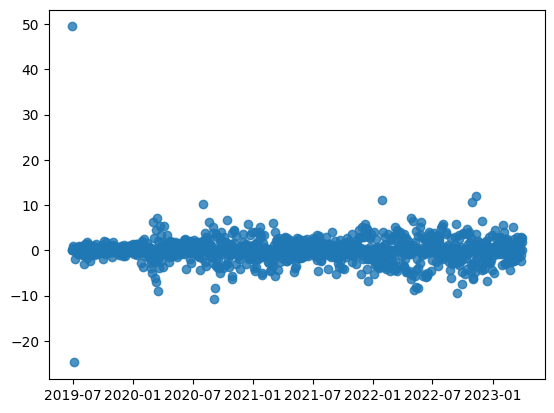

In [32]:
plt.scatter(residuals.index, residuals, alpha=0.8) 

<br>il QQ-plot mi permette di determinare se il mio dataset è distribuito secondo la distrbuzione normale<br>

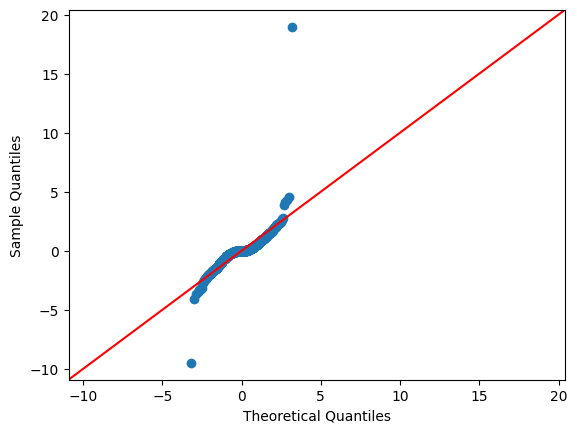

In [33]:
residuals = residuals.rename(columns = {0: "Resid"})
residuals = residuals.sort_values(by = "Resid")
sm.qqplot(residuals, line = '45', fit = True);

<br>Vado ad effettuare sul  mio dataframe un train-test dividendolo per 80% train e il restante 20% test:<br>

In [34]:
train = df[df.index <="2023-04-01"]
test = df[df.index >= "2023-04-02"] 

<br>A questo punto mi affido ad una funzione automatizzata settando i parametri max_p/max_q/max_order basandomi sulle precedenti analisi di ACF, PACF e Differenziazione<br>

In [26]:
import pmdarima as pm

model = pm.auto_arima(train, start_p=0, start_q=0, start_order=0, max_p=1 ,max_q=1, max_order=1, test='adf', stepwise=False, trace=True, seasonal=False) 

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5988.892, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5985.080, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5985.367, Time=0.24 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.544 seconds


In [27]:
model = ARIMA(train, order=(0,1,1),seasonal_order=(0,1,1,7))
result = model.fit()
print(result.summary())


                                    SARIMAX Results                                    
Dep. Variable:                           Close   No. Observations:                 1374
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -2993.027
Date:                         Thu, 27 Jun 2024   AIC                           5992.054
Time:                                 23:05:53   BIC                           6007.713
Sample:                             06-28-2019   HQIC                          5997.915
                                  - 04-01-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0679      0.021     -3.232      0.001      -0.109      -0.027
ma.S.L7       -0.9999      0.661     -1.513      0.130     

<pr>Genero le previsioni basate sul modello ARIMA:<pr>

In [28]:
forecast_test = result.get_forecast(steps=len(test))
forecast_df = forecast_test.predicted_mean
conf_int = forecast_test.conf_int()
forecast_test

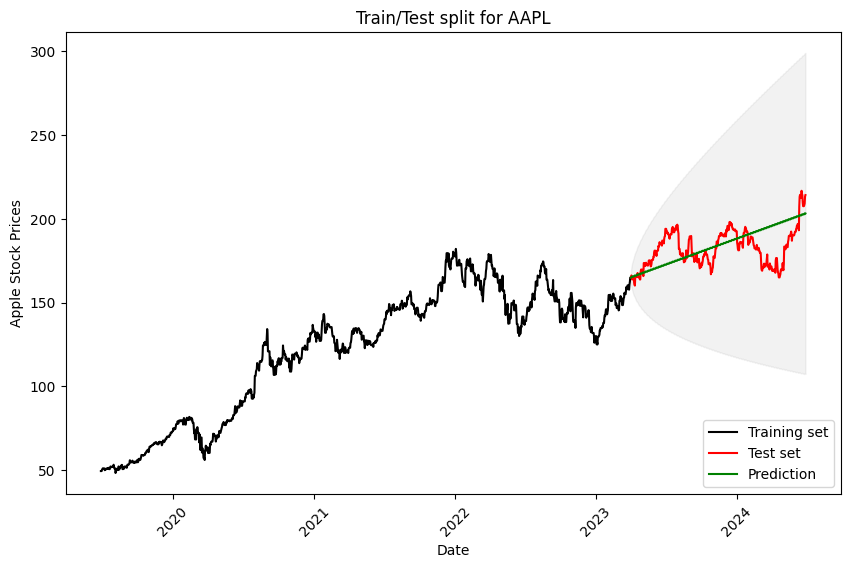

In [29]:


plt.figure(figsize=(10, 6))
plt.plot(train, color="black", label="Training set")
plt.plot(test, color="red", label="Test set")
plt.plot(forecast_df, color='green', label='Prediction')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.10)

plt.ylabel('Apple Stock Prices')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for AAPL")
plt.legend(loc="lower right")
plt.show()

# Coonclusioni:
<br>Le previsioni seguono una tendenza simile ai dati di test, questo ci fa capire che il modello ha una buona capacità di catturare la tendenza di fondo del prezzo delle azioni <br>
<br>Il modello reagisce alle fluttuazioni nei dati di test, sebbene non catturi ogni picco o calo, il che è normale in molti modelli di previsione che tendono a lisciare le fluttuazioni a medio-lungo termine. <br>
<br>Mentre le previsioni sembrano allinearsi generalmente bene con la direzione del test set, l'ampiezza dell'intervallo di confidenza ci dice  che c'è una significativa incertezza nelle previsioni. Questo potrebbe essere dovuto alla volatilità del prezzo delle azioni o alla limitata capacità del modello di prevedere accuratamente i movimenti futuri del mercato.<br>
<br>Modelli di machine learning  come LSTM potrebbero catturare meglio quello che è la volatilità della serie<br> 

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mape = np.mean(np.abs(forecast_df - test)/np.abs(test))
print('Mean Absolute Percentage Error (MAPE)'+str(mape))
mae = mean_absolute_error(test, forecast_df)
print('Mean Absolute Error (MAE):', mae)
rmse = np.sqrt(mean_squared_error(test, forecast_df))
print('Root Mean Squared Error (RMSE):', rmse)


Mean Absolute Percentage Error (MAPE)0.05470618164320948
Mean Absolute Error (MAE): 9.885749318294666
Root Mean Squared Error (RMSE): 12.617561587119576
